# Visualization Descriptive Statistics

Of the 4 involved data sets a collection of statistics is created to gain a first insight.
For this, we extract named entities, words and characters from the queries. Accordingly, 4 subcategories arise:
- queries
- named entities
- words
- characters 

For each category, the length is measured in terms of all sublevels. E.g. the length of a named entity can be described as the number of words or the number of characters. Alongside, the items of each subcategory are sorted with respect to their frequency to check for specific liguistic laws like zipfs's law. Essentially, we obtain a thorough set of statistics.

### 1. Zipf's law 
Zipf's law states that frequencies of words from a document follow an inversely proportional distribution to their rank when sorted in descending order. To get a more comprehensive comparison between the data sets, we check on zipf's law for all subcategories.
 

To get started, lets define some configuration for our visualization:

In [1]:
from thesis_schneg.model import DatasetName, AnalysisName

##### set visualization configuration #####

# save visualization or not
save_vis: bool = False
# save_vis: bool = True

# select dataset (if none is selected all datasets are visualized in a joint plot) 
dataset: DatasetName = None 
# dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

# set analysis that should be visualized
# analysis_name: AnalysisName = 'zipfs-law-queries'
analysis_name: AnalysisName = 'extract-named-entities'
# analysis_name: AnalysisName = 'extract-words'
# analysis_name: AnalysisName = 'extract-chars'

# test_data = True
test_data = False



Load the specified data:

In [ ]:
from thesis_schneg.vis_modules import _get_results_paths, load_results
import time
color = None
label = None
result_data = {}
# load data
if dataset is None:
    # crawl files from all datasets and load into dictionary
    paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
        "aol", "ms-marco", "orcas", "aql"]}
    # iterate over datasets and create visualization
    for name, result_paths in paths.items():
        start_time = time.time()
        print(f"Loading data from {name} dataset")
        vis_data = load_results(result_paths, test_data=test_data)
        result_data.update({name: vis_data})
        end_time = time.time()  
        print(f"{name} loaded in {(end_time - start_time)/60} min")
    color = ['blue', 'orange', 'red', 'purple']
    label=["AOL", "MS-MARCO", "ORCAS", "AQL"]
else:
    # load data from single dataset
    result_paths = _get_results_paths(dataset, analysis_name)
    start_time = time.time()
    print(f"Loading data from {dataset} dataset")
    result_data = {dataset: load_results(result_paths, use_arrow=True)}
    end_time = time.time()  
    print(f"{dataset} loaded in {(end_time - start_time)/60} min")

Loading data from aol dataset
aol loaded in 0.0060321569442749025 min
Loading data from ms-marco dataset
ms-marco loaded in 0.003877691427866618 min
Loading data from orcas dataset
orcas loaded in 0.004662477970123291 min
Loading data from aql dataset
aql loaded in 0.006707489490509033 min


Start the visualization:

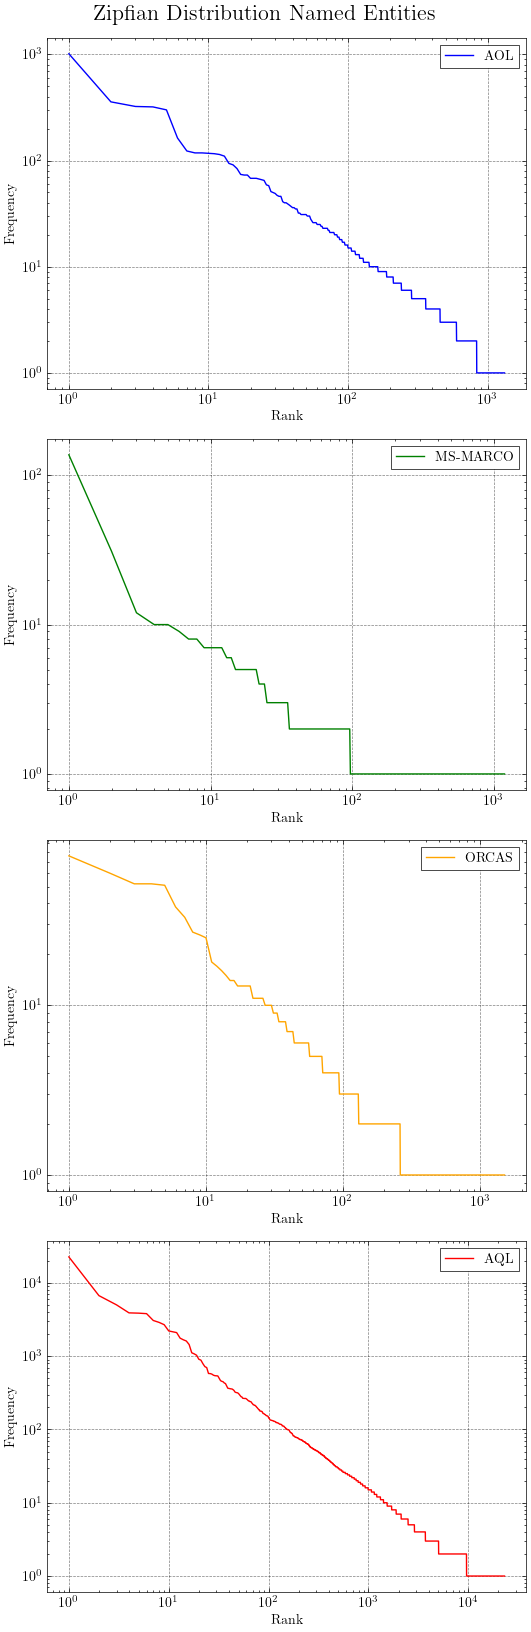

In [12]:
from thesis_schneg.vis_modules import log_plot
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib

# load visualization parametes into dictionary
if analysis_name == 'zipfs-law-queries':
    vis_params = {"dataset-col-x": "serp_query_text_url", "dataset-col-y": "count()", "x-label": "Rank", "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipfian Distribution Queries"}
elif analysis_name == 'extract-named-entities':
    vis_params = {"dataset-col-x": "entity", "dataset-col-y": "count()", "x-label": "Rank", "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipfian Distribution Named Entities"}
elif analysis_name == 'extract-words':
    vis_params = {"dataset-col-x": "word", "dataset-col-y": "count()", "x-label": "Rank", "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipfian Distribution Words"}
elif analysis_name == 'extract-chars':
    vis_params = {"dataset-col-x": "char", "dataset-col-y": "count()", "x-label": "Rank", "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipfian Distribution Characters"}


dataset: DatasetName = None 
# dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

# latex rendering for matplotlib
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)

# set path to save visualization
# vis_dir = Path(
#         f"/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/plots/{analysis_name}")
vis_dir = Path(
        f"/home/benjamin/studium/masterarbeit/thesis-schneg/plots/{analysis_name}")
# make directory if it does not exist
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

# enable pgf format for matplotlib
if save_vis:
    matplotlib.use("pgf")
# use science style for plots from scienceplots library
plt.style.use(["science", "grid"])

# create visualization for all data sets if dataset is not specified
if dataset is None:

    multi = True
    # set size of plot
    textwidth = 5.5129
    aspect_ratio = 6/8
    scale = 1.0
    width = textwidth * scale
    height = width * aspect_ratio

    # create subplots for each dataset
    fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(width, 4*height))

    # counter for datasets
    cnt_datasets = 0

    # color palette for datasets
    color = ['blue', 'green', 'orange', 'red']

    # iterate over datasets and create visualization
    for name, vis_data in result_data.items():
        # apply specific visualization function
        fig, ax[cnt_datasets] = log_plot(data=vis_data, subplots=(fig, ax[cnt_datasets]),
                                            vis_params=vis_params, label=name.upper(), multi=multi, color=color[cnt_datasets]) #, color=color[cnt_datasets]
        cnt_datasets += 1
    
    # create title
    fig.suptitle(
        vis_params["title"], fontsize=16, y=0.99)
    
    # make layout tight
    plt.tight_layout()

    # either save visualization or show it  
    if save_vis:
        fig.savefig(vis_dir.joinpath("all.pgf"))
    else:
        plt.show()

# create visualization for a specific data set:
else: 
    multi = False 
    # enable pgf format for matplotlib
    if save_vis:
        matplotlib.use("pgf")

    # use science style for plots from scienceplots library
    plt.style.use(["science", "grid"])

    # modify title
    vis_params["title"] = f'{vis_params["title"]} ({dataset.upper()})'

    # set size of plot
    textwidth = 5.5129
    aspect_ratio = 6/8
    scale = 1.0
    width = textwidth * scale
    height = width * aspect_ratio

    # create subplot for dataset
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))
    # if type(vis_data[vis_params["dataset-col-x"]].iloc[0]) is str:
    #     x = list(range(1, len(vis_data[vis_params["dataset-col-x"]])+1))
    #     height = vis_data[vis_params["dataset-col-y"]].to_numpy()
    #     height = np_sort(a=height, kind='mergesort')[::-1]
    #     print(x)
    #     print(height)
    # apply specific visualization function
    fig, ax = log_plot(data=result_data[dataset], subplots=(fig, ax),
                        vis_params=vis_params, multi=multi)
    
    # make layout tight
    plt.tight_layout()
    
    # either save visualization or show it
    if save_vis:
        fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
    else:
        plt.show()


